In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import allan_variance
np.random.seed(0)
import pandas as pd
from matplotlib.ticker import ScalarFormatter

/home/su/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def read_txt(datafile):
    with open(datafile, "r") as file:
        lines = file.readlines()
        data = [[float(num) for num in line.split()] for line in lines]
    return data


In [3]:
EKF = np.array(read_txt("../data/EKF.txt"))
UKF = np.array(read_txt("../data/UKF.txt"))
dt = 0.01

(array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
        1.e-01, 1.e+00, 1.e+01]),
 [Text(0, 1e-09, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-08, '$\\mathdefault{10^{-8}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 1e-06, '$\\mathdefault{10^{-6}}$'),
  Text(0, 1e-05, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.0001, '$\\mathdefault{10^{-4}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$')])

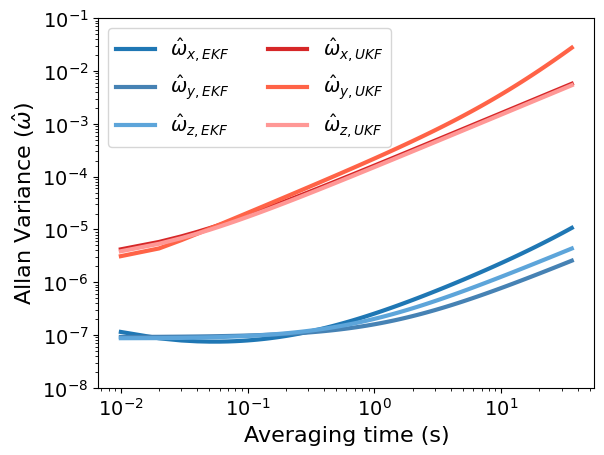

In [4]:
# DISIMU, omega hat
tau_wx_EKF, avar_wx_EKF = allan_variance.compute_avar(EKF[:,0], dt)
tau_wy_EKF, avar_wy_EKF = allan_variance.compute_avar(EKF[:,1], dt)
tau_wz_EKF, avar_wz_EKF = allan_variance.compute_avar(EKF[:,2], dt)
tau_wx_UKF, avar_wx_UKF = allan_variance.compute_avar(UKF[:,0], dt)
tau_wy_UKF, avar_wy_UKF = allan_variance.compute_avar(UKF[:,1], dt)
tau_wz_UKF, avar_wz_UKF = allan_variance.compute_avar(UKF[:,2], dt)
params_wx_EKF, avar_pred_wx_EKF = allan_variance.estimate_parameters(tau_wx_EKF, avar_wx_EKF)
params_wy_EKF, avar_pred_wy_EKF = allan_variance.estimate_parameters(tau_wy_EKF, avar_wy_EKF)
params_wz_EKF, avar_pred_wz_EKF = allan_variance.estimate_parameters(tau_wz_EKF, avar_wz_EKF)
params_wx_UKF, avar_pred_wx_UKF = allan_variance.estimate_parameters(tau_wx_UKF, avar_wx_UKF)
params_wy_UKF, avar_pred_wy_UKF = allan_variance.estimate_parameters(tau_wy_UKF, avar_wy_UKF)
params_wz_UKF, avar_pred_wz_UKF = allan_variance.estimate_parameters(tau_wz_UKF, avar_wz_UKF)
# print(f"DISIMU omega hat: {params_wx_EKF}, {params_wy_EKF}, {params_wz_EKF}, {params_wx_UKF}, {params_wy_UKF}, {params_wz_UKF}")

# Computed
fig, ax = plt.subplots()
plt.loglog(tau_wx_EKF, avar_pred_wx_EKF, label="$\hat{\omega}_{x,EKF}$", linewidth=3, color = "#1f77b4")
plt.loglog(tau_wy_EKF, avar_pred_wy_EKF, label="$\hat{\omega}_{y,EKF}$", linewidth=3, color = "#4682b4")
plt.loglog(tau_wz_EKF, avar_pred_wz_EKF, label="$\hat{\omega}_{z,EKF}$", linewidth=3, color = "#5da5da")
plt.loglog(tau_wx_UKF, avar_pred_wx_UKF, label="$\hat{\omega}_{x,UKF}$", linewidth=3, color = "#d62728")
plt.loglog(tau_wy_UKF, avar_pred_wy_UKF, label="$\hat{\omega}_{y,UKF}$", linewidth=3, color = "#ff6347")
plt.loglog(tau_wz_UKF, avar_pred_wz_UKF, label="$\hat{\omega}_{z,UKF}$", linewidth=3, color = "#ff9896")

plt.ylim([1e-8, 1e-1])

plt.legend(ncol=2, fancybox=True, frameon=True, fontsize=14, loc='upper left')
plt.xlabel("Averaging time (s)", fontsize=16)
plt.ylabel("Allan Variance ($\hat{\omega}$)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([1.e-14, 1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00,
        1.e+02]),
 [Text(0, 1e-14, '$\\mathdefault{10^{-14}}$'),
  Text(0, 1e-12, '$\\mathdefault{10^{-12}}$'),
  Text(0, 1e-10, '$\\mathdefault{10^{-10}}$'),
  Text(0, 1e-08, '$\\mathdefault{10^{-8}}$'),
  Text(0, 1e-06, '$\\mathdefault{10^{-6}}$'),
  Text(0, 0.0001, '$\\mathdefault{10^{-4}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$')])

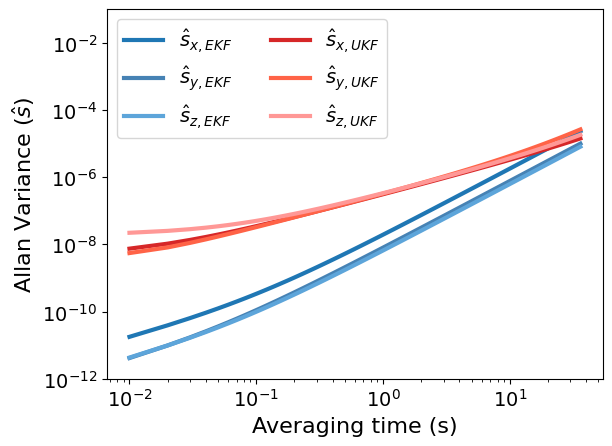

In [5]:
# DISIMU, omega hat
tau_wx_EKF, avar_wx_EKF = allan_variance.compute_avar(EKF[:,6], dt)
tau_wy_EKF, avar_wy_EKF = allan_variance.compute_avar(EKF[:,7], dt)
tau_wz_EKF, avar_wz_EKF = allan_variance.compute_avar(EKF[:,8], dt)
tau_wx_UKF, avar_wx_UKF = allan_variance.compute_avar(UKF[:,6], dt)
tau_wy_UKF, avar_wy_UKF = allan_variance.compute_avar(UKF[:,7], dt)
tau_wz_UKF, avar_wz_UKF = allan_variance.compute_avar(UKF[:,8], dt)
params_wx_EKF, avar_pred_wx_EKF = allan_variance.estimate_parameters(tau_wx_EKF, avar_wx_EKF)
params_wy_EKF, avar_pred_wy_EKF = allan_variance.estimate_parameters(tau_wy_EKF, avar_wy_EKF)
params_wz_EKF, avar_pred_wz_EKF = allan_variance.estimate_parameters(tau_wz_EKF, avar_wz_EKF)
params_wx_UKF, avar_pred_wx_UKF = allan_variance.estimate_parameters(tau_wx_UKF, avar_wx_UKF)
params_wy_UKF, avar_pred_wy_UKF = allan_variance.estimate_parameters(tau_wy_UKF, avar_wy_UKF)
params_wz_UKF, avar_pred_wz_UKF = allan_variance.estimate_parameters(tau_wz_UKF, avar_wz_UKF)
# print(f"DISIMU omega hat: {params_wx_EKF}, {params_wy_EKF}, {params_wz_EKF}, {params_wx_UKF}, {params_wy_UKF}, {params_wz_UKF}")

# Computed
fig, ax = plt.subplots()
plt.loglog(tau_wx_EKF, avar_pred_wx_EKF, label="$\hat{s}_{x,EKF}$", linewidth=3, color = "#1f77b4")
plt.loglog(tau_wy_EKF, avar_pred_wy_EKF, label="$\hat{s}_{y,EKF}$", linewidth=3, color = "#4682b4")
plt.loglog(tau_wz_EKF, avar_pred_wz_EKF, label="$\hat{s}_{z,EKF}$", linewidth=3, color = "#5da5da")
plt.loglog(tau_wx_UKF, avar_pred_wx_UKF, label="$\hat{s}_{x,UKF}$", linewidth=3, color = "#d62728")
plt.loglog(tau_wy_UKF, avar_pred_wy_UKF, label="$\hat{s}_{y,UKF}$", linewidth=3, color = "#ff6347")
plt.loglog(tau_wz_UKF, avar_pred_wz_UKF, label="$\hat{s}_{z,UKF}$", linewidth=3, color = "#ff9896")

plt.ylim([1e-12, 1e-1])

plt.legend(ncol=2, fancybox=True, frameon=True, fontsize=14, loc='upper left')
plt.xlabel("Averaging time (s)", fontsize=16)
plt.ylabel("Allan Variance ($\hat{s}$)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Simulation

In [6]:
x = [1, 3, 6, 9, 12, 15, 18]

w_x_WN = [0.003272, 0.001780, 0.001268, 0.000947, 0.000934, 0.000809, 0.000771]
w_x_RW = [0.018881, 0.012090, 0.007268, 0.005541, 0.005197, 0.004616, 0.004702]
a_x_WN = [0.004665, 0.004716, 0.002726, 0.002110, 0.001713, 0.001500, 0.001365]
a_x_RW = [0.001025, 0.000627, 0.000466, 0.000424, 0.000310, 0.000188, 0.000259]
w_y_WN = [0.002518, 0.001727, 0.001121, 0.000903, 0.000806, 0.000778, 0.000654]
w_y_RW = [0.015099, 0.010252, 0.006242, 0.005094, 0.004482, 0.004202, 0.003639]
a_y_WN = [0.004400, 0.003005, 0.002136, 0.001791, 0.001579, 0.001407, 0.001256]
a_y_RW = [0.000204, 0.000479, 0.000370, 0.000336, 0.000333, 0.000229, 0.000156]
w_z_WN = [0.002912, 0.001921, 0.001343, 0.001041, 0.000890, 0.000851, 0.000773]
w_z_RW = [0.014843, 0.009858, 0.006477, 0.005118, 0.004526, 0.004628, 0.004320]
a_z_WN = [0.004732, 0.003062, 0.002128, 0.001754, 0.001545, 0.001408, 0.001281]
a_z_RW = [0.000782, 0.000427, 0.000000, 0.000253, 0.000234, 0.000258, 0.000268]

/tmp/ipykernel_5756/685819317.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)


(0.0, 18.0)

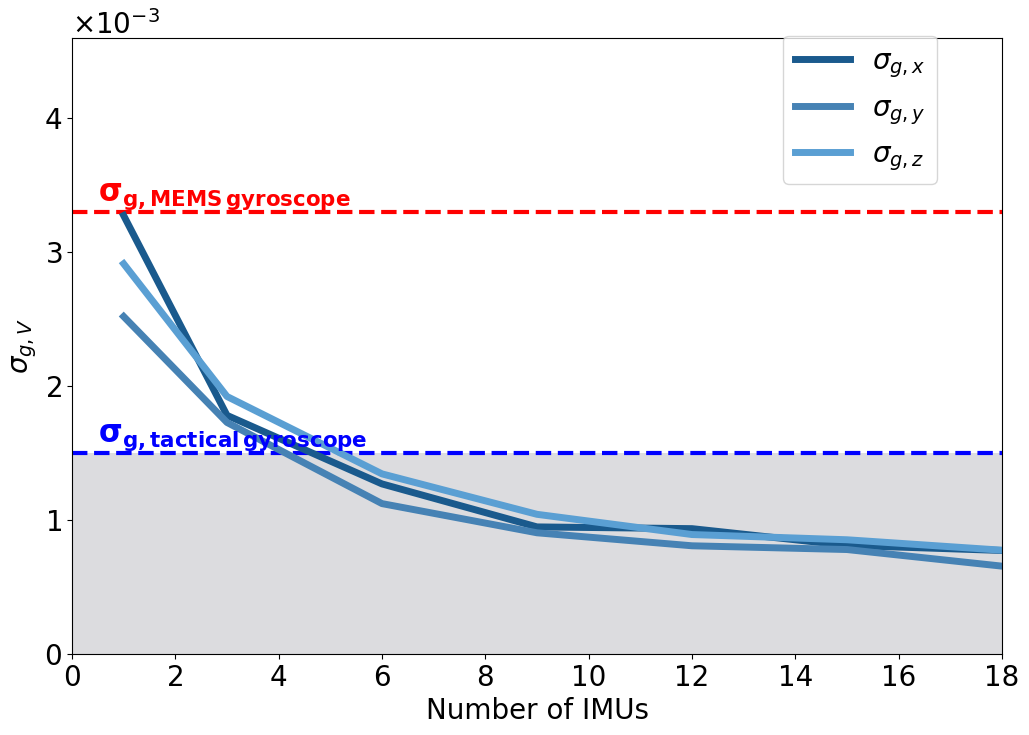

In [18]:
fig1, ax1 = plt.subplots(figsize = (12, 8))
plt.axhline(y=3.3e-3, color='r', linestyle='--', linewidth=3)
plt.axhline(y=1.5e-3, color='b', linestyle='--', linewidth=3)
ax1.plot(x, w_x_WN, linewidth=5, color = "#1a5a8d", label = "$\sigma_{g,x}$")
ax1.plot(x, w_y_WN, linewidth=5, color = "#4682b4", label = "$\sigma_{g,y}$")
ax1.plot(x, w_z_WN, linewidth=5, color = "#5a9fd3", label = "$\sigma_{g,z}$")
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(ncol=1, fancybox=True, frameon=True, fontsize=20, bbox_to_anchor=(0.75, 0.74))
ax1.set_xlabel("Number of IMUs", fontsize=20)
ax1.set_ylabel("$\sigma_{g,V}$", fontsize=20)
ax1.text(0.5, 1.5e-3, "$\mathbf{\sigma_{g, tactical\, gyroscope}}$", color="b", fontsize=22,  ha="left", va="bottom")
ax1.text(0.5, 3.3e-3, "$\mathbf{\sigma_{g, MEMS\, gyroscope}}$", color="r", fontsize=22,  ha="left", va="bottom")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(20)
ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)
ax1.axhspan(ymin=0, ymax=1.5e-3, facecolor='#505060', alpha=0.2)
ax1.set_ylim([0, 0.46e-2])
ax1.set_xlim([0, 18])


/tmp/ipykernel_5756/1703965128.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)


(0.0, 18.0)

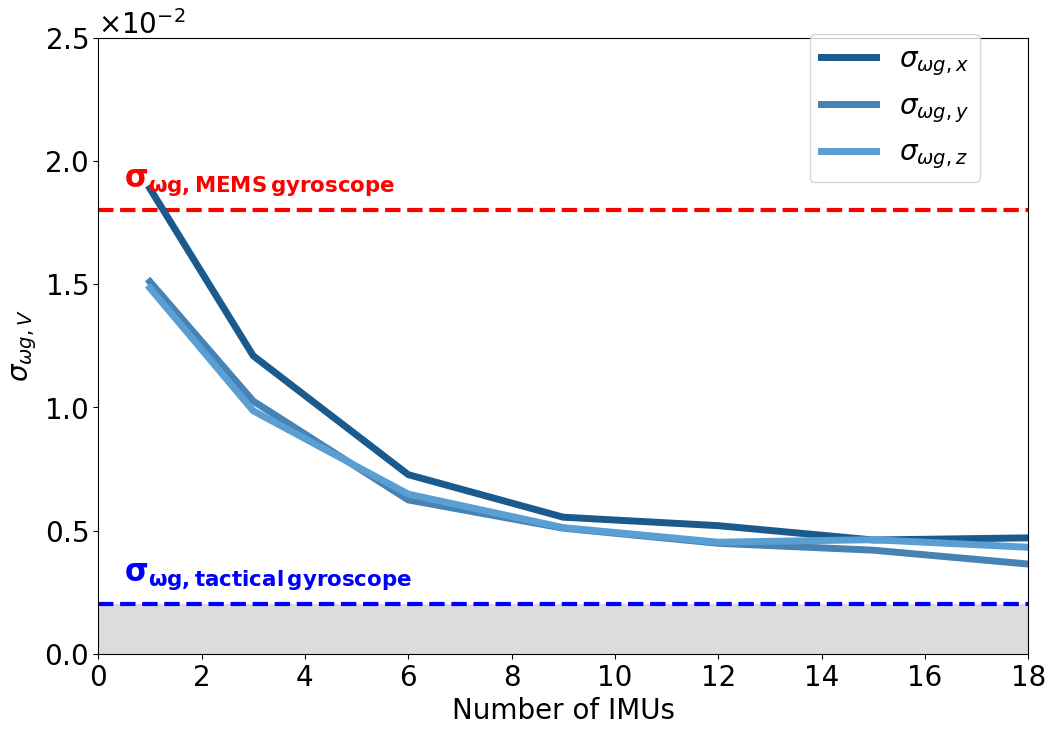

In [19]:
fig1, ax1 = plt.subplots(figsize = (12, 8))
plt.axhline(y=0.018, color='r', linestyle='--', linewidth=3)
plt.axhline(y=2e-3, color='b', linestyle='--', linewidth=3)
ax1.plot(x, w_x_RW, linewidth=5, color = "#1a5a8d", label = "$\sigma_{\omega g,x}$")
ax1.plot(x, w_y_RW, linewidth=5, color = "#4682b4", label = "$\sigma_{\omega g,y}$")
ax1.plot(x, w_z_RW, linewidth=5, color = "#5a9fd3", label = "$\sigma_{\omega g,z}$")
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(ncol=1, fancybox=True, frameon=True, fontsize=20, bbox_to_anchor=(0.75, 0.743))
ax1.set_xlabel("Number of IMUs", fontsize=20)
ax1.set_ylabel("$\sigma_{\omega g,V}}$", fontsize=20)
ax1.text(0.5, 2.5e-3, "$\mathbf{\sigma_{\omega g, tactical\, gyroscope}}$", color="b", fontsize=22,  ha="left", va="bottom")
ax1.text(0.5, 0.0185, "$\mathbf{\sigma_{\omega g, MEMS\, gyroscope}}$", color="r", fontsize=22,  ha="left", va="bottom")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(20)
ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)
ax1.axhspan(ymin=0, ymax=2e-3, facecolor='#505060', alpha=0.2)
ax1.set_ylim([0, 2.5e-2])
ax1.set_xlim([0, 18])


/tmp/ipykernel_5756/4214667319.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)


(0.0, 18.0)

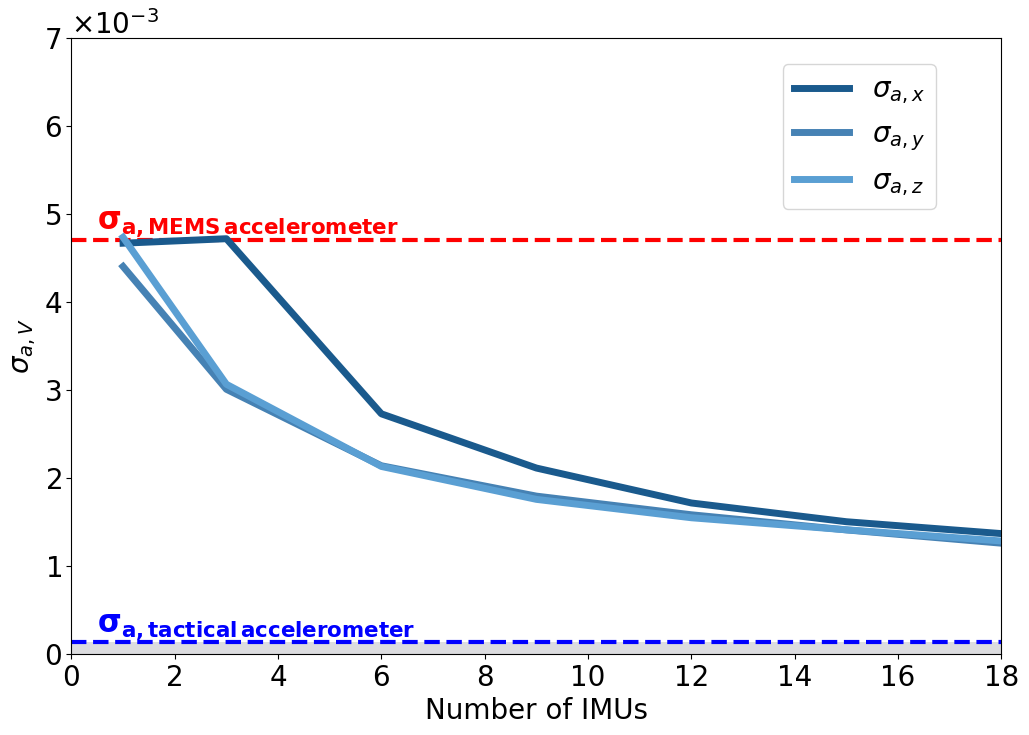

In [20]:
fig1, ax1 = plt.subplots(figsize = (12, 8))
plt.axhline(y=4.7e-3, color='r', linestyle='--', linewidth=3)
plt.axhline(y=1.3e-4, color='b', linestyle='--', linewidth=3)
ax1.plot(x, a_x_WN, linewidth=5, color = "#1a5a8d", label = "$\sigma_{a,x}$")
ax1.plot(x, a_y_WN, linewidth=5, color = "#4682b4", label = "$\sigma_{a,y}$")
ax1.plot(x, a_z_WN, linewidth=5, color = "#5a9fd3", label = "$\sigma_{a,z}$")
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(ncol=1, fancybox=True, frameon=True, fontsize=20, bbox_to_anchor=(0.75, 0.7))
ax1.set_xlabel("Number of IMUs", fontsize=20)
ax1.set_ylabel("$\sigma_{a,V}}$", fontsize=20)
ax1.text(0.5, 1.31e-4, "$\mathbf{\sigma_{a, tactical\,accelerometer}}$", color="b", fontsize=22,  ha="left", va="bottom")
ax1.text(0.5, 4.71e-3, "$\mathbf{\sigma_{a, MEMS\, accelerometer}}$", color="r", fontsize=22,  ha="left", va="bottom")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(20)
ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)
ax1.axhspan(ymin=0, ymax=1.3e-4, facecolor='#505060', alpha=0.2)
ax1.set_ylim([0, 7e-3])
ax1.set_xlim([0, 18])


/tmp/ipykernel_5756/1863189607.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)


(0.0, 18.0)

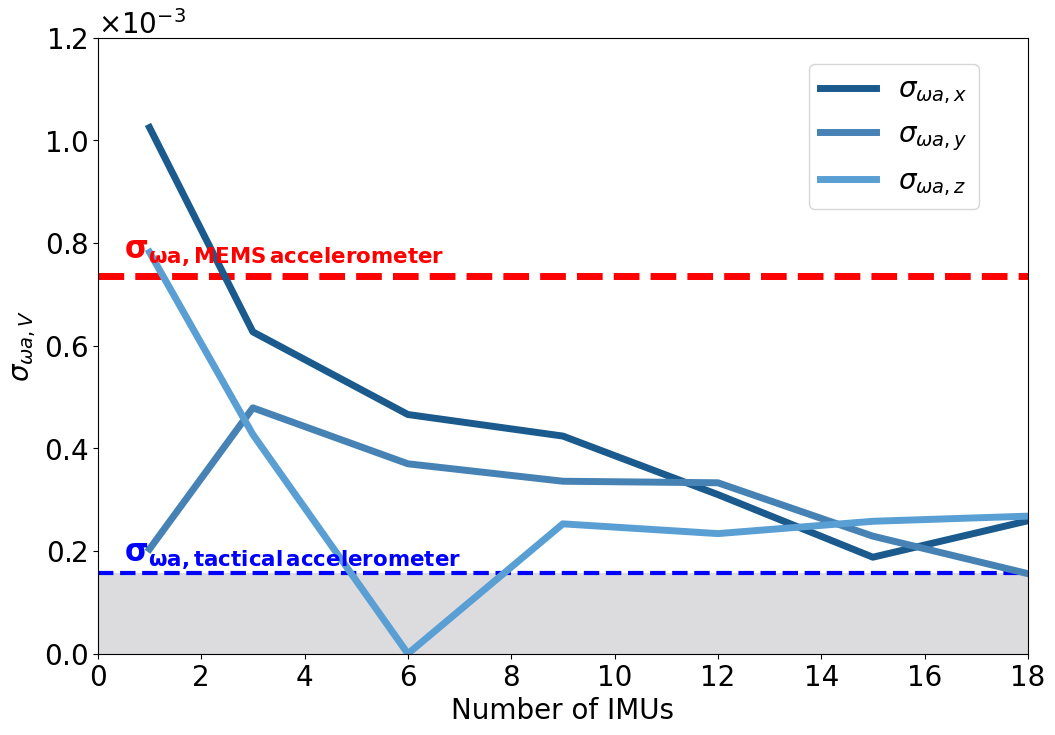

In [22]:
fig1, ax1 = plt.subplots(figsize = (12, 8))
plt.axhline(y=7.36e-4, color='r', linestyle='--', linewidth=5)
plt.axhline(y=1.57e-4, color='b', linestyle='--', linewidth=3)
ax1.plot(x, a_x_RW, linewidth=5, color = "#1a5a8d", label = "$\sigma_{\omega a,x}$")
ax1.plot(x, a_y_RW, linewidth=5, color = "#4682b4", label = "$\sigma_{\omega a,y}$")
ax1.plot(x, a_z_RW, linewidth=5, color = "#5a9fd3", label = "$\sigma_{\omega a,z}$")

ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(ncol=1, fancybox=True, frameon=True, fontsize=20, bbox_to_anchor=(0.75, 0.7))
ax1.set_xlabel("Number of IMUs", fontsize=20)
ax1.set_ylabel("$\sigma_{\omega a,V}$", fontsize=20)
ax1.text(0.5, 1.6e-4, "$\mathbf{\sigma_{\omega a, tactical\, accelerometer}}$", color="b", fontsize=22,  ha="left", va="bottom")
ax1.text(0.5, 7.5e-4, "$\mathbf{\sigma_{\omega a, MEMS\, accelerometer}}$", color="r", fontsize=22,  ha="left", va="bottom")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(20)
ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)
ax1.axhspan(ymin=0, ymax=1.57e-4, facecolor='#505060', alpha=0.2)
ax1.set_ylim([0, 1.2e-3])
ax1.set_xlim([0, 18])
